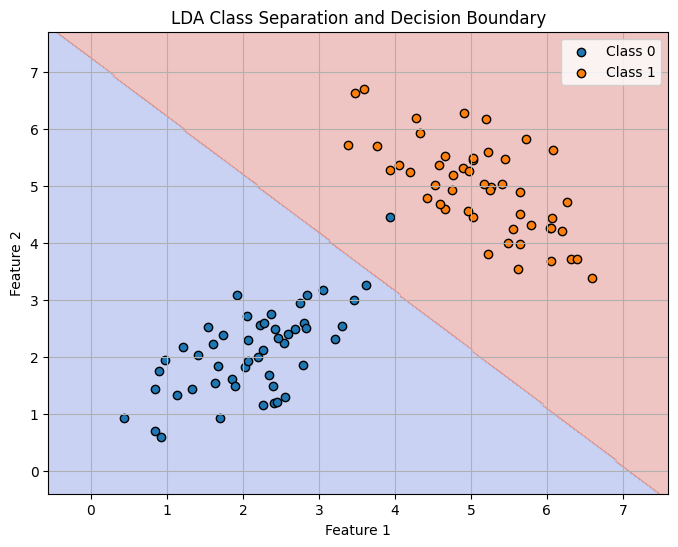

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Generate synthetic 2D data
np.random.seed(42)
class_0 = np.random.multivariate_normal(mean=[2, 2], cov=[[0.8, 0.6], [0.6, 0.8]], size=50)
class_1 = np.random.multivariate_normal(mean=[5, 5], cov=[[0.8, -0.6], [-0.6, 0.8]], size=50)

X = np.vstack((class_0, class_1))
y = np.array([0]*50 + [1]*50)

# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Predict on grid to show decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = lda.predict(grid).reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, alpha=0.3, cmap='coolwarm')
plt.scatter(class_0[:, 0], class_0[:, 1], label="Class 0", edgecolor='k')
plt.scatter(class_1[:, 0], class_1[:, 1], label="Class 1", edgecolor='k')
plt.title("LDA Class Separation and Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[-1.45927545 -0.02854376]
 [-1.79770574 -0.4843855 ]
 [-2.41694888  0.09278403]
 [-2.26247349  1.58725251]
 [-2.54867836  0.4722049 ]
 [-2.42996725  0.96613207]
 [-2.44848456 -0.79596195]
 [-0.22266651  1.58467318]
 [-1.75020123  0.82118013]
 [-1.95842242  0.35156375]
 [-1.19376031  2.6344557 ]
 [-1.85892567 -0.31900654]
 [-1.15809388  2.64340991]
 [-2.66605725  0.64250454]
 [-0.37836722 -0.08663893]
 [-1.20117255 -0.08443736]
 [-2.76810246 -0.03219954]
 [-0.77685404  1.65916185]
 [-3.49805433  1.68495616]
 [-1.09042788  1.6265835 ]
 [-3.71589615 -1.04451442]
 [-0.99761037  0.4905306 ]
 [-3.83525931  1.40595806]
 [-2.25741249  1.42679423]
 [-1.25571326  0.5464242 ]
 [-1.43755762  0.13

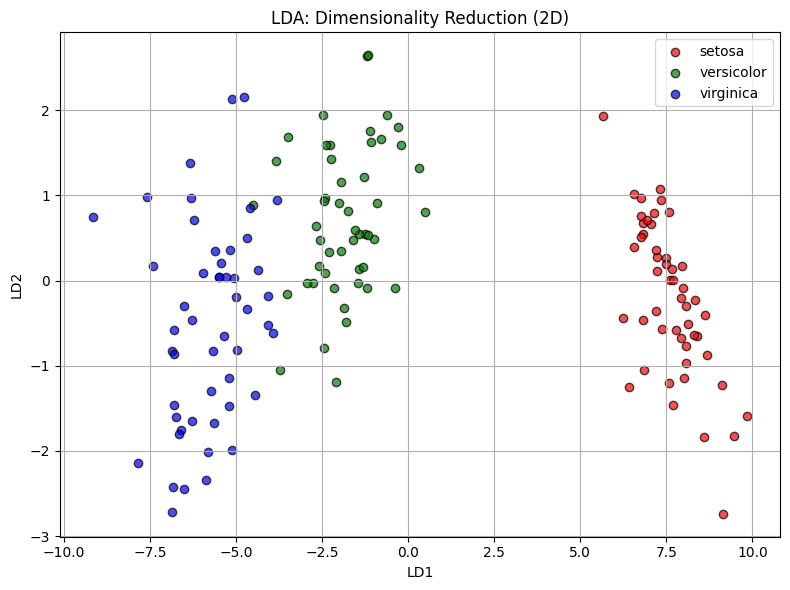

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load dataset (3 classes, 4 features)
data = load_iris()
X = data.data         # shape (150, 4)
y = data.target       # shape (150,)
target_names = data.target_names

# Apply LDA to reduce to 2D
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
print(y.shape)
print(X_lda[y == 1])

# Plot the reduced data
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for color, i, label in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=0.7, color=color, label=label, edgecolor='k')

plt.title('LDA: Dimensionality Reduction (2D)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
